In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

#### Importante, en el bivariate la última salida es reactions, una lista con el tipo de reacciones, nos permitirá sacar la estadística de ambos tiempos

In [2]:
K = 10**4
mu1 = 10**-4
mu2 = 10**-4

nEE = 1.5#0.96
nEI = 1#0.24
nIE = -1 #-0.3
nII = 0. #0./10

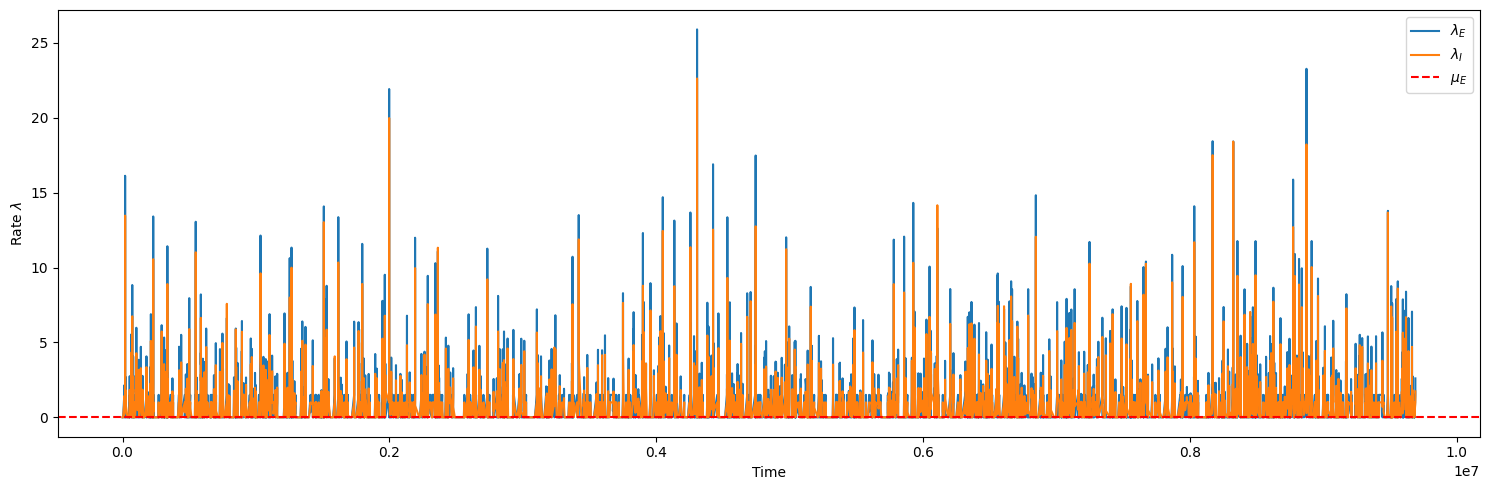

In [3]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

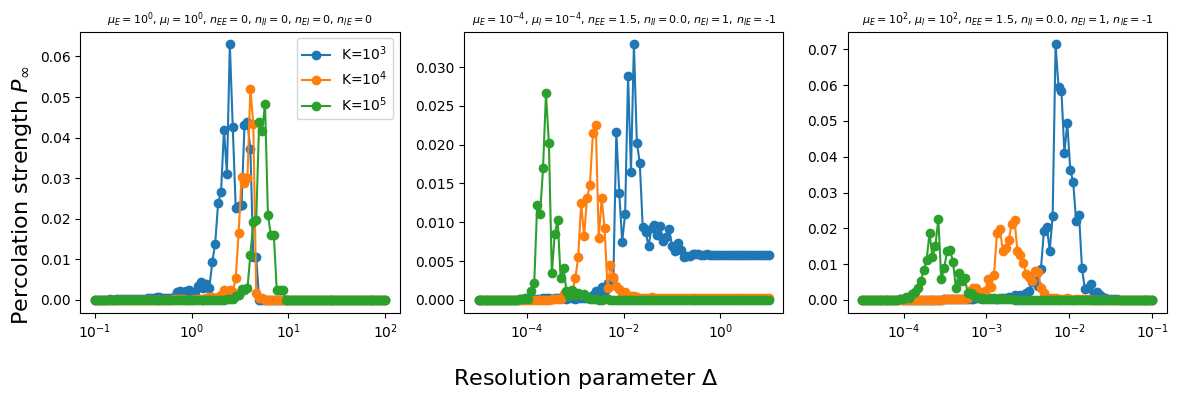

In [8]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-4.5, -1, 100)]
np.save(f'./data/deltas_bivariate_stationary', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_stationary_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_stationary_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Double transition parameters

In [9]:
K = 10**4
mu1 = 10**-4
mu2 = 10**-4

nEE = 0.96
nEI = 0.24
nIE = -0.3
nII = 0./10

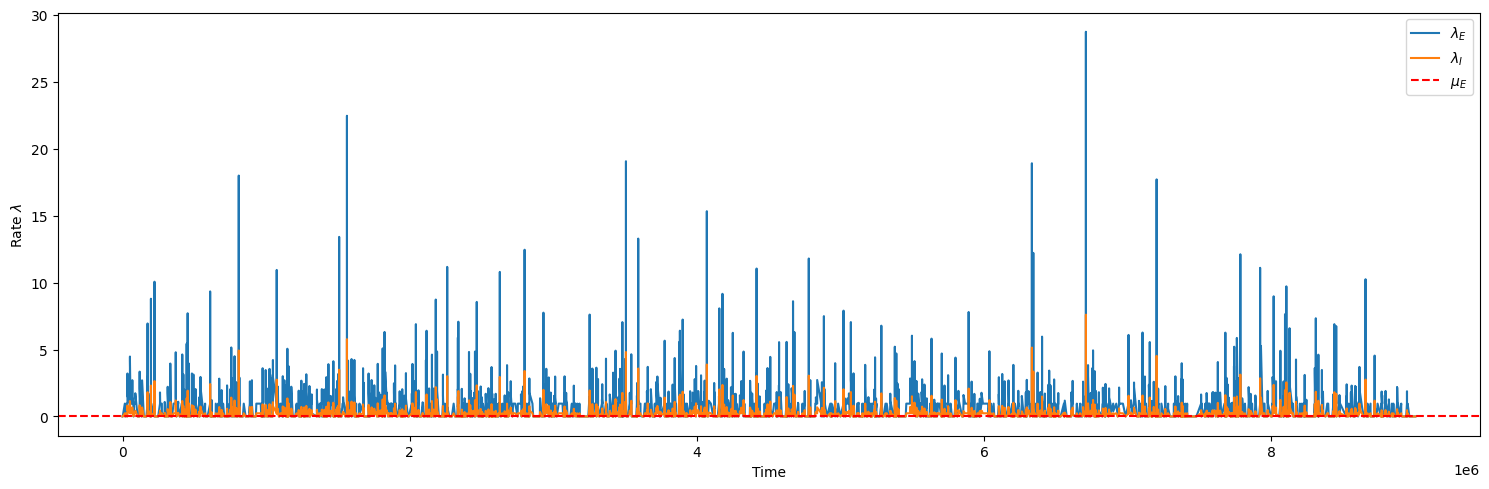

In [10]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

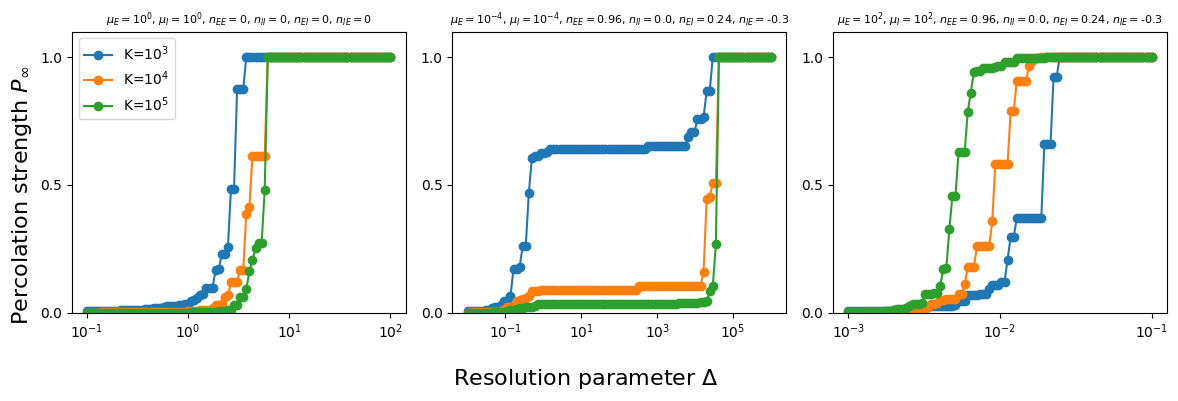

In [12]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-2, 6, 100), np.logspace(-3, -1, 100)]
np.save(f'./data/deltas_bivariate_PRL', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_PRL_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_PRL_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Stats

In [83]:
def plot_histograms(ax, data, bins, x , y, title):
    hist = np.histogram(data, bins=bins, density=True)
    ax.scatter(bins[:-1], hist[0], label = title)
    ax.set_xscale('log')
    ax.set_yscale('log')

def calculate_histogram_data(K, nEE, nII, nEI, nIE, muE, muI, delta, R):
    all_cluster_sizes = []
    all_cluster_times = []

    for _ in range(R):
        _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
        clusters = identify_clusters(times, delta)
        cluster_sizes = [len(cluster) for cluster in clusters]
        cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)

    return all_cluster_sizes, all_cluster_times

R = 1
K = 10**4

mu_values = [10**-4, 10**2]
deltas = np.logspace(-5, -1, num=4, base=10)
delta_labels = ['$\Delta=10^{-5}$', '$\Delta=10^{-4}$', '$\Delta=10^{-3}$', '$\Delta=10^{-2}$', '$\Delta=10^{-1}$']

s_bins = np.logspace(0, 4.5, num=60, base=10)
t_bins = np.logspace(-6, 3, num=60, base=10)

y_s = s_bins**(-2)
y_t = t_bins**(-2) * 10**-5
y_s2 = s_bins**(-3/2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Añadir ylabel a la figura principal
fig.supylabel('Probability distribution', va='center', rotation='vertical')

for col, mu in enumerate(mu_values):
    all_sizes = []
    all_times = []
    for delta_idx, delta in enumerate(deltas):
        sizes, times = calculate_histogram_data(K, nEE, nII, nEI, nIE, mu, mu, delta, R)
        all_sizes.append(sizes)
        all_times.append(times)
    
        # Plot cluster sizes
        plot_histograms(
            axes[0, col],
            sizes,
            s_bins,
            y_s,
            '',
            delta_labels[delta_idx]
        )
        axes[0, col].set_ylabel('')
        axes[0, col].set_xlabel('Cluster sizes $S$')

        # Plot cluster durations
        plot_histograms(
            axes[1, col],
            times,
            'Cluster duration $T$',
            f'$\Delta=10^{{{int(np.log10(delta))}}}$'
        )
        axes[1, col].set_ylabel('')
        axes[1, col].set_xlabel('Cluster duration $T$')

    # Añadir título solo en las figuras de arriba
    axes[0, col].set_title(f'$\mu = 10^{{{int(np.log10(mu))}}}$')

# Añadir etiquetas del eje x en las figuras de abajo
for ax in axes[1]:
    ax.set_xlabel('Cluster duration $T$')

# Ajustar tamaño de la figura
fig.set_size_inches(10, 10)
fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
#fig.axes[0].plot(s_bins, y_s2, color='blue')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
#fig.axes[1].plot(s_bins, y_s2, color='blue')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')

fig.axes[0].legend(loc = 'best')
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)
fig.suptitle(f'Statistics of avalanches for various $\Delta$ values', fontsize=20)
fig.tight_layout()

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


TypeError: plot_histograms() missing 2 required positional arguments: 'y' and 'title'

Error in callback <function _draw_all_if_interactive at 0x00000246FB936830> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 1000x1000 with 4 Axes>

# Percolation plots

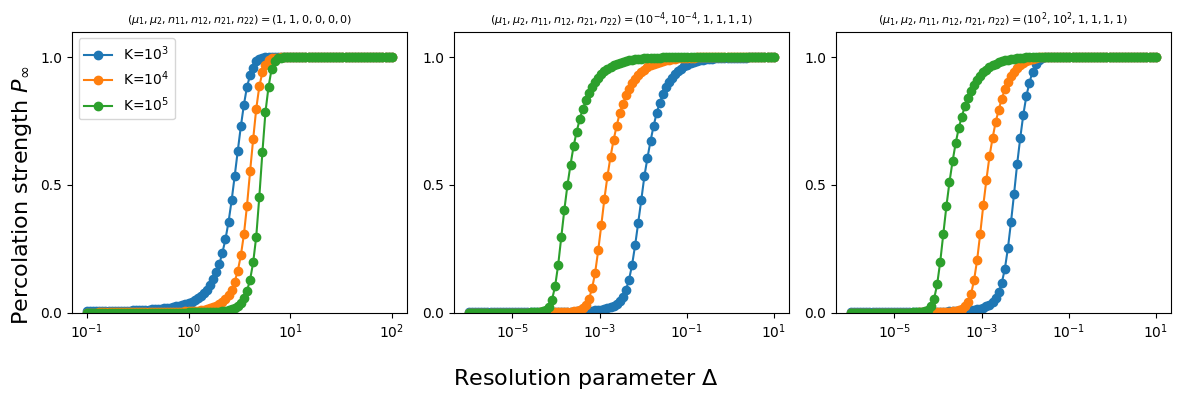

In [4]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-6, 1, 100), np.logspace(-6, 1, 100)]
np.save(f'./data/deltas_bivariate', deltas)
ns11 = [0, 1, 1]
ns22 = [0, 1, 1]
ns12 = [0, 1, 1]
ns21 = [0, 1, 1]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, reactions = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)
        percolation_strength = np.mean(percolations, axis=0)
        np.save(f'./data/percolation_means_bivariate_plot{i}_K={K}', percolation_strength)
        ax.plot(delta, percolation_strength, marker = 'o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.axes[0].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (1, 1, 0, 0, 0, 0)$', fontsize = 8)
fig.axes[1].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{-4}, 10^{-4}, 1, 1, 1, 1)$', fontsize = 8)
fig.axes[2].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{2}, 10^{2}, 1, 1, 1, 1)$', fontsize = 8)
fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Stats señal "estacionaria"